# International Football History Analysis

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the files
results_df = pd.read_csv("results.csv")
shootouts_df = pd.read_csv("shootouts.csv")
goalscorers_df = pd.read_csv("goalscorers.csv")


In [68]:
results_df.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [69]:
shootouts_df.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


In [70]:
goalscorers_df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [71]:
# Change the date format 
results_df['date'] = pd.to_datetime(results_df['date']).dt.strftime('%d-%m-%Y')
shootouts_df['date'] = pd.to_datetime(shootouts_df['date']).dt.strftime('%d-%m-%Y')
goalscorers_df['date'] = pd.to_datetime(goalscorers_df['date']).dt.strftime('%d-%m-%Y')

In [72]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,30-11-1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,08-03-1873,England,Scotland,4,2,Friendly,London,England,False
2,07-03-1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,06-03-1875,England,Scotland,2,2,Friendly,London,England,False
4,04-03-1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [73]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44691 non-null  object
 1   home_team   44691 non-null  object
 2   away_team   44691 non-null  object
 3   home_score  44691 non-null  int64 
 4   away_score  44691 non-null  int64 
 5   tournament  44691 non-null  object
 6   city        44691 non-null  object
 7   country     44691 non-null  object
 8   neutral     44691 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


In [74]:
results_df.describe()

,home_score,away_score
count,44691.000000,44691.000000
mean,1.738717,1.178492
std,1.746678,1.393406
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [75]:
results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [76]:
# Home and Away matches count
home_team_counts = results_df['home_team'].value_counts()
away_team_counts = results_df['away_team'].value_counts()

print(f'Most matches as {home_team_counts[0:10]}\n\nMost matches as {away_team_counts[0:10]}')

Most matches as home_team
Brazil         597
Argentina      577
Mexico         558
Germany        530
England        527
Sweden         511
France         507
South Korea    503
Hungary        478
Italy          467
Name: count, dtype: int64

Most matches as away_team
Uruguay      562
Sweden       548
England      526
Hungary      492
Paraguay     475
Germany      461
Poland       450
Argentina    449
Zambia       447
Finland      436
Name: count, dtype: int64


In [77]:
away_team_counts.tail()

away_team
Manchukuo        1
Corsica          1
Central Spain    1
Surrey           1
St Lucia         1
Name: count, dtype: int64

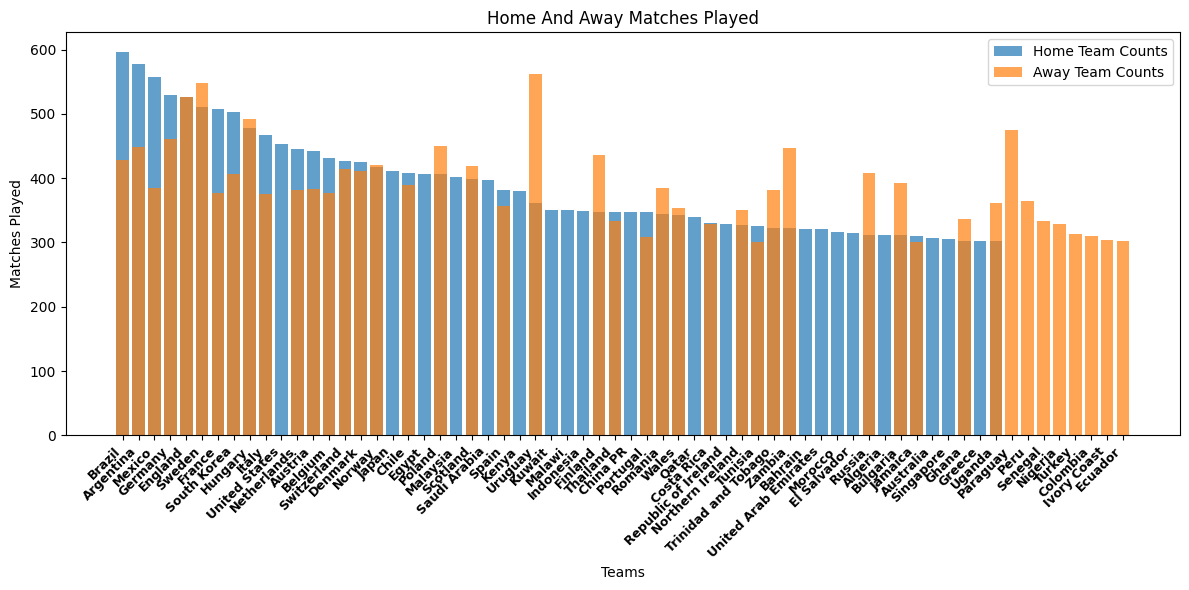

In [78]:
# Teams with at least 300 games
top_home_team_counts = home_team_counts[home_team_counts >= 300]
top_away_team_counts = away_team_counts[away_team_counts >= 300]

# Figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the number of matches played by the home and away teams
ax.bar(top_home_team_counts.index, top_home_team_counts.values, label='Home Team Counts', alpha=0.7)
ax.bar(top_away_team_counts.index, top_away_team_counts.values, label='Away Team Counts', alpha=0.7)

# Increase spacing for X-axis labels
plt.subplots_adjust(bottom=0.3)

# Reduce font size of X-axis labels and rotate them for readability
plt.xticks(fontsize=9, rotation=45, ha='right', fontweight='bold')

# Add title and axis labels
plt.title('Home And Away Matches Played')
plt.xlabel('Teams')
plt.ylabel('Matches Played')

# Show the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [79]:
# Combine the counts into a single table
total_games_played = pd.concat([home_team_counts, away_team_counts], axis=1, keys=['Home', 'Away'])

# Fill NaN values with 0 for teams that only played as either home or away
total_games_played = total_games_played.fillna(0).astype(int)

# Calculate the total number of games played for each team
total_games_played['Total'] = total_games_played['Home'] + total_games_played['Away']

# Sort the DataFrame in descending order of total games played
total_games_played = total_games_played.sort_values(by='Total', ascending=False)

# Display the DataFrame
total_games_played.head(10)

,Home,Away,Total
Sweden,511,548,1059
England,527,526,1053
Brazil,597,429,1026
Argentina,577,449,1026
Germany,530,461,991
Hungary,478,492,970
Mexico,558,384,942
Uruguay,361,562,923
South Korea,503,406,909
France,507,377,884


In [80]:
total_games_played.tail(10)

,Home,Away,Total
Mapuche,2,0,2
Niue,2,0,2
Aymara,1,1,2
Palau,2,0,2
Madrid,1,0,1
Ticino,1,0,1
Asturias,0,1,1
Cape Verde Islands,0,1,1
Surrey,0,1,1
St Lucia,0,1,1


In [81]:
# Filter Madrid matches
madrid_matches = results_df.loc[(results_df['home_team'] == 'Madrid') | (results_df['away_team'] == 'Madrid')]

# Show the results
madrid_matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
35592,07-06-2013,Madrid,Andalusia,1,2,Friendly,Madrid,Spain,False


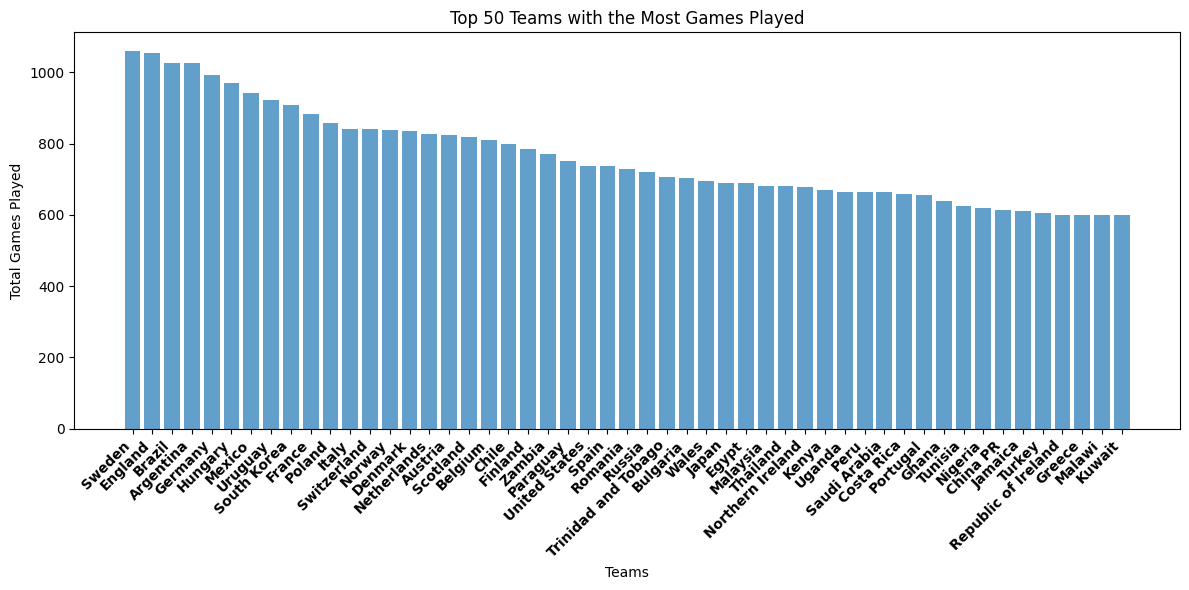

In [82]:
# Get the top 50 teams with the most games played
top_50_teams = total_games_played.nlargest(50, 'Total', keep='all')

# Create a bar plot to visualize the total games played 
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_50_teams.index, top_50_teams['Total'], alpha=0.7)

# Rotate the labels on the x-axis for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Add labels and title
plt.xlabel('Teams')
plt.ylabel('Total Games Played')
plt.title('Top 50 Teams with the Most Games Played')

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
# Calculate the number of home wins, draws, and losses for each team
home_wins_counts = results_df.apply(lambda row: 1 if row['home_score'] > row['away_score'] else 0, axis=1).groupby(results_df['home_team']).sum()
home_draws_counts = results_df.apply(lambda row: 1 if row['home_score'] == row['away_score'] else 0, axis=1).groupby(results_df['home_team']).sum()
home_losses_counts = results_df.apply(lambda row: 1 if row['home_score'] < row['away_score'] else 0, axis=1).groupby(results_df['home_team']).sum()

# Combine the counts into a single table
home_results_df = pd.DataFrame({
    'Home Wins': home_wins_counts,
    'Home Draws': home_draws_counts,
    'Home Losses': home_losses_counts
})

# Calculate the number of away wins, draws, and losses for each team
away_wins_counts = results_df.apply(lambda row: 1 if row['home_score'] < row['away_score'] else 0, axis=1).groupby(results_df['away_team']).sum()
away_draws_counts = results_df.apply(lambda row: 1 if row['home_score'] == row['away_score'] else 0, axis=1).groupby(results_df['away_team']).sum()
away_losses_counts = results_df.apply(lambda row: 1 if row['home_score'] > row['away_score'] else 0, axis=1).groupby(results_df['away_team']).sum()

# Combine the counts into a single table
away_results_df = pd.DataFrame({
    'Away Wins': away_wins_counts,
    'Away Draws': away_draws_counts,
    'Away Losses': away_losses_counts
})

# Merge the home and away counts into a single DataFrame
team_results_df = home_results_df.merge(away_results_df, how='outer', left_index=True, right_index=True)

# Fill NaN values with 0 for teams that only played as either home or away
team_results_df = team_results_df.fillna(0).astype(int)

# Display the DataFrame
team_results_df.head(20)


,Home Wins,Home Draws,Home Losses,Away Wins,Away Draws,Away Losses
Abkhazia,9,7,2,3,5,2
Afghanistan,17,9,16,15,19,45
Albania,70,45,77,27,32,114
Alderney,0,0,7,3,0,9
Algeria,175,76,61,66,74,100
American Samoa,4,2,18,1,0,23
Andalusia,7,4,1,1,0,0
Andorra,10,15,77,2,10,84
Angola,89,62,37,42,73,82
Anguilla,2,3,19,1,4,41


In [84]:
team_results_df.loc['Uruguay']

Home Wins      201
Home Draws      98
Home Losses     62
Away Wins      202
Away Draws     127
Away Losses    233
Name: Uruguay, dtype: int32

In [85]:
# Merge the relevant columns from total_games_played into team_results_df
team_results_df['Total Home Games'] = total_games_played['Home']
team_results_df['Total Away Games'] = total_games_played['Away']
team_results_df['Total Games'] = total_games_played['Total']

# Display the updated team_results_df DataFrame with the new columns
team_results_df.head(10)

,Home Wins,Home Draws,Home Losses,Away Wins,Away Draws,Away Losses,Total Home Games,Total Away Games,Total Games
Abkhazia,9,7,2,3,5,2,18,10,28
Afghanistan,17,9,16,15,19,45,42,79,121
Albania,70,45,77,27,32,114,192,173,365
Alderney,0,0,7,3,0,9,7,12,19
Algeria,175,76,61,66,74,100,312,240,552
American Samoa,4,2,18,1,0,23,24,24,48
Andalusia,7,4,1,1,0,0,12,1,13
Andorra,10,15,77,2,10,84,102,96,198
Angola,89,62,37,42,73,82,188,197,385
Anguilla,2,3,19,1,4,41,24,46,70


In [86]:
# Calculate the percentage of wins, draws, and losses for each team and create the DataFrame 'team_percentages'
team_percentages = pd.DataFrame({
    'Win (%)': ((team_results_df['Home Wins'] + team_results_df['Away Wins']) / team_results_df['Total Games']) * 100,
    'Draw (%)': ((team_results_df['Home Draws'] + team_results_df['Away Draws'])/ team_results_df['Total Games']) * 100,
    'Loss (%)': ((team_results_df['Home Losses'] + team_results_df['Away Losses'])/ team_results_df['Total Games']) * 100,
    'Home Win (%)': (team_results_df['Home Wins'] / team_results_df['Total Home Games']) * 100,
    'Home Draw (%)': (team_results_df['Home Draws'] / team_results_df['Total Home Games']) * 100,
    'Home Loss (%)': (team_results_df['Home Losses'] / team_results_df['Total Home Games']) * 100,
    'Away Win (%)': (team_results_df['Away Wins'] / team_results_df['Total Away Games']) * 100,
    'Away Draw (%)': (team_results_df['Away Draws'] / team_results_df['Total Away Games']) * 100,
    'Away Loss (%)': (team_results_df['Away Losses'] / team_results_df['Total Away Games']) * 100
})

# Display the DataFrame
team_percentages.head()


,Win (%),Draw (%),Loss (%),Home Win (%),Home Draw (%),Home Loss (%),Away Win (%),Away Draw (%),Away Loss (%)
Abkhazia,42.857143,42.857143,14.285714,50.000000,38.888889,11.111111,30.000000,50.000000,20.000000
Afghanistan,26.446281,23.140496,50.413223,40.476190,21.428571,38.095238,18.987342,24.050633,56.962025
Albania,26.575342,21.095890,52.328767,36.458333,23.437500,40.104167,15.606936,18.497110,65.895954
Alderney,15.789474,0.000000,84.210526,0.000000,0.000000,100.000000,25.000000,0.000000,75.000000
Algeria,43.659420,27.173913,29.166667,56.089744,24.358974,19.551282,27.500000,30.833333,41.666667


In [87]:
team_percentages.loc[["Argentina"]]

,Win (%),Draw (%),Loss (%),Home Win (%),Home Draw (%),Home Loss (%),Away Win (%),Away Draw (%),Away Loss (%)
Argentina,54.483431,24.658869,20.8577,66.377816,21.663778,11.958406,39.198218,28.507795,32.293987


In [88]:
team_percentages.loc[["Uruguay"]]

,Win (%),Draw (%),Loss (%),Home Win (%),Home Draw (%),Home Loss (%),Away Win (%),Away Draw (%),Away Loss (%)
Uruguay,43.661972,24.377031,31.960997,55.67867,27.146814,17.174515,35.94306,22.597865,41.459075


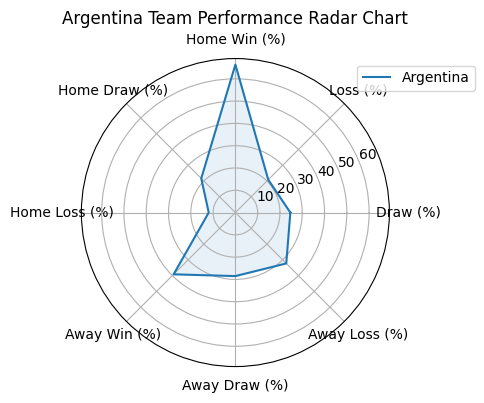

In [89]:
# Filter the DataFrame to include only Argentina
argentina_percentages = team_percentages.loc['Argentina']

# Define the list of categories (win, draw, loss)
categories = team_percentages.columns[1:]

# Define the data for Argentina's win, draw, and loss percentages
data = argentina_percentages[1:]

# Calculate the number of categories
num_categories = len(categories)

# Create a figure and axis for the radar chart
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

# Ensure data length is the same as the number of categories by repeating the first value
data = np.concatenate((data, [data[0]]))

# Calculate the angle for each category
angles = [i / float(num_categories) * 2 * np.pi for i in range(num_categories)]
angles += angles[:1]

# Plot Argentina's data on the radar chart
ax.plot(angles, data, label='Argentina')
ax.fill(angles, data, alpha=0.1)

# Set the labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Set the title and legend
plt.title('Argentina Team Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

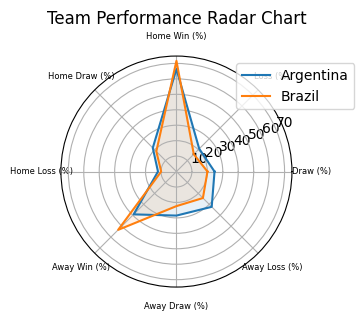

In [90]:
# Define the countries to plot
selected_teams_perc = ['Argentina', 'Brazil']

# Define the list of categories (win, draw, loss)
categories = team_percentages.columns[1:]

# Calculate the number of categories
num_categories = len(categories)

# Create a figure and axis for the radar chart
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))

# Loop through each country and plot their radar chart
for country in selected_teams_perc:
    # Filter the DataFrame to include only the country
    country_percentages = team_percentages.loc[country]
    
    # Get the data for win, draw, and loss percentages
    data = country_percentages[1:]
    
    # Ensure data length is the same as the number of categories by repeating the first value
    data = np.concatenate((data, [data[0]]))
    
    # Calculate the angle for each category
    angles = [i / float(num_categories) * 2 * np.pi for i in range(num_categories)]
    angles += angles[:1]
    
    # Plot the data on the radar chart
    ax.plot(angles, data, label=country)
    ax.fill(angles, data, alpha=0.1)

# Set the labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=6)

# Set the title and legend
plt.title('Team Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()

In [91]:
# Reset the index of 'team_results_df'
team_results_df_reset = team_results_df.reset_index()

# Select only the columns of interest (Win (%), Draw (%), and Loss (%)) from the 'team_percentages' DataFrame
best_team_percentages = team_percentages[['Win (%)', 'Draw (%)', 'Loss (%)']].copy()

# Sort the DataFrame by the Win (%) column in descending order
best_team_percentages = best_team_percentages.sort_values(by='Win (%)', ascending=False)

# Create a list of teams that have less than 100 games played from 'team_results_df'
teams_less_than_100_games = team_results_df[team_results_df['Total Games'] < 100].index.tolist()

# Filter the teams with less than 100 games played from 'best_team_percentages' DataFrame
best_team_percentages = best_team_percentages[~best_team_percentages.index.isin(teams_less_than_100_games)]

# Display the result
best_team_percentages.head(10)

,Win (%),Draw (%),Loss (%)
Brazil,64.035088,20.077973,15.886940
Spain,58.073270,23.473541,18.453189
Germany,58.022200,20.887992,21.089808
England,57.075024,23.836657,19.088319
Iran,55.597723,24.857685,19.544592
Argentina,54.483431,24.658869,20.857700
Italy,53.087886,27.909739,19.002375
Czech Republic,52.976190,19.642857,27.380952
South Korea,52.585259,25.852585,21.562156
Croatia,52.341598,26.997245,20.661157


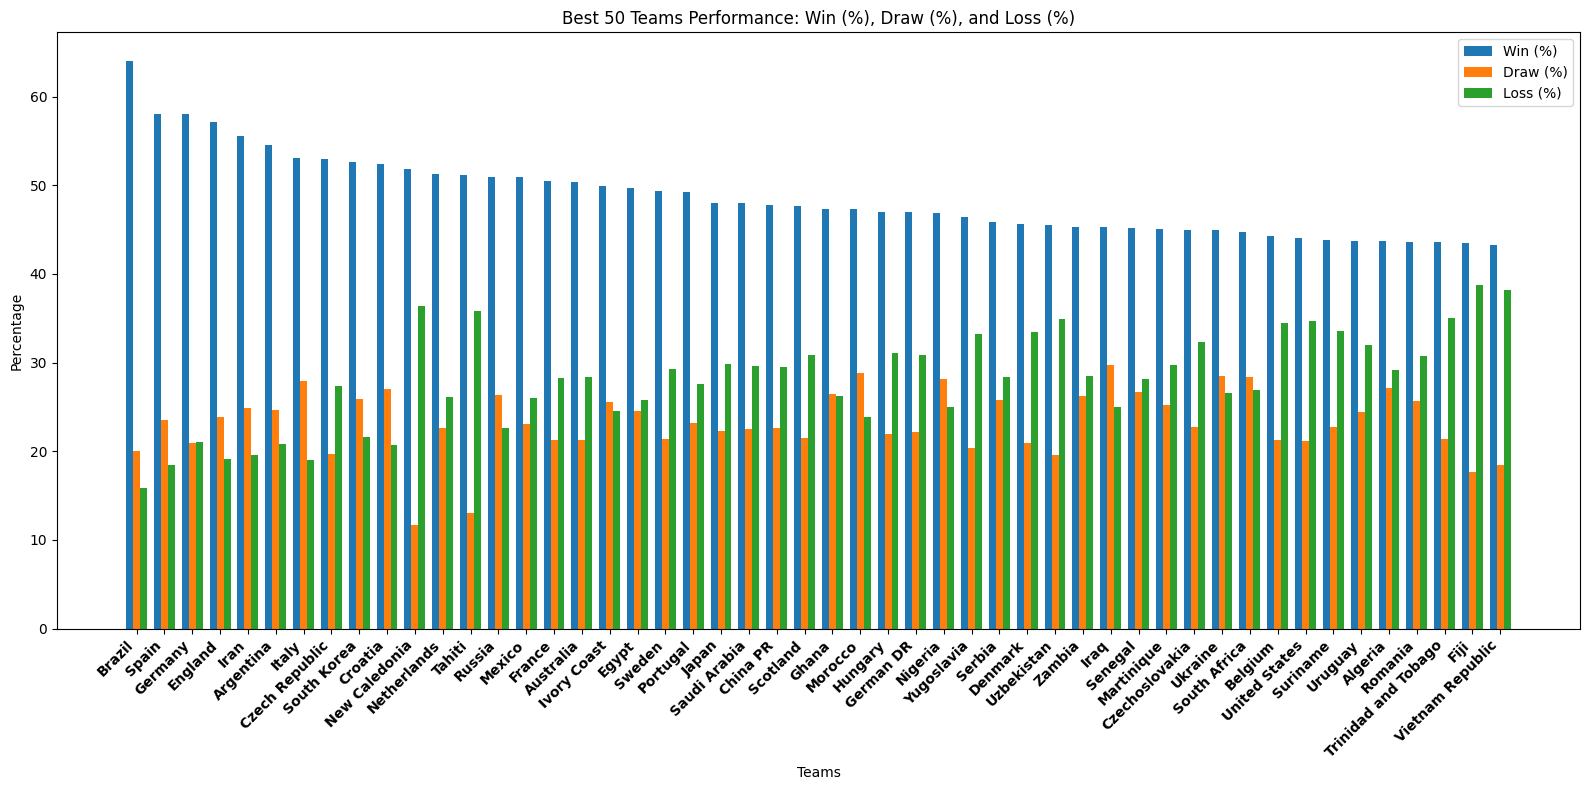

In [92]:
# Select the top 50 teams from the 'best_team_percentages' DataFrame
top_50_teams = best_team_percentages.head(50)

# Set the categories (teams) and their corresponding percentages
teams = top_50_teams.index
win_percentages = top_50_teams['Win (%)']
draw_percentages = top_50_teams['Draw (%)']
loss_percentages = top_50_teams['Loss (%)']

# Set the width of the bars
width = 0.25

# Create a figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the bars for each percentage category
ax.bar(range(len(teams)), win_percentages, width, label='Win (%)')
ax.bar([pos + width for pos in range(len(teams))], draw_percentages, width, label='Draw (%)')
ax.bar([pos + 2 * width for pos in range(len(teams))], loss_percentages, width, label='Loss (%)')

# Set the labels and title
ax.set_xticks([pos + width for pos in range(len(teams))])
ax.set_xticklabels(teams, rotation=45, ha='right', fontweight='bold')
ax.set_xlabel('Teams')
ax.set_ylabel('Percentage')
plt.title('Best 50 Teams Performance: Win (%), Draw (%), and Loss (%)')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
# Calculate the total wins, draws, and losses for each team
team_results_df['Total Wins'] = team_results_df['Home Wins'] + team_results_df['Away Wins']
team_results_df['Total Draws'] = team_results_df['Home Draws'] + team_results_df['Away Draws']
team_results_df['Total Losses'] = team_results_df['Home Losses'] + team_results_df['Away Losses']

# Create the overall team result DataFrame with total wins, total draws, and total losses
overall_team_results_df = team_results_df[['Total Wins', 'Total Draws', 'Total Losses']]

# Display the overall team result DataFrame
overall_team_results_df.head()

,Total Wins,Total Draws,Total Losses
Abkhazia,12,12,4
Afghanistan,32,28,61
Albania,97,77,191
Alderney,3,0,16
Algeria,241,150,161


In [94]:
# Calculate the total points for each team
team_results_df['Total Points'] = (team_results_df['Total Wins'] * 3) + (team_results_df['Total Draws'] * 1)

# Create a new DataFrame with the columns 'Total Points', 'Total Wins', 'Total Draws', and 'Total Losses'
overall_team_results_df = team_results_df[['Total Points', 'Total Wins', 'Total Draws', 'Total Losses', 'Total Games']]

# Add the percentages columns to the df 
overall_team_results_df = overall_team_results_df.join(team_percentages[['Win (%)', 'Draw (%)', 'Loss (%)']]).round(2) 

# Sort the DataFrame by the 'Total Points' column in descending order
overall_team_results_df = overall_team_results_df.sort_values(by='Total Points', ascending=False)

# Display the overall team result DataFrame
overall_team_results_df.head(20)


,Total Points,Total Wins,Total Draws,Total Losses,Total Games,Win (%),Draw (%),Loss (%)
Brazil,2177,657,206,163,1026,64.04,20.08,15.89
England,2054,601,251,201,1053,57.08,23.84,19.09
Germany,1932,575,207,209,991,58.02,20.89,21.09
Argentina,1930,559,253,214,1026,54.48,24.66,20.86
Sweden,1793,522,227,310,1059,49.29,21.44,29.27
South Korea,1669,478,235,196,909,52.59,25.85,21.56
Mexico,1657,480,217,245,942,50.96,23.04,26.01
Hungary,1581,456,213,301,970,47.01,21.96,31.03
Italy,1576,447,235,160,842,53.09,27.91,19.00
France,1526,446,188,250,884,50.45,21.27,28.28


In [95]:
popular_tournaments = results_df['tournament'].value_counts()[results_df['tournament'].value_counts() > 100]
popular_tournaments

tournament
Friendly                                17647
FIFA World Cup qualification             7878
UEFA Euro qualification                  2677
African Cup of Nations qualification     1976
FIFA World Cup                            964
Copa América                              841
AFC Asian Cup qualification               764
African Cup of Nations                    741
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Merdeka Tournament                        595
British Home Championship                 517
UEFA Nations League                       472
Gulf Cup                                  395
AFC Asian Cup                             370
Gold Cup                                  367
Island Games                              350
UEFA Euro                                 337
COSAFA Cup                                309
AFF Championship                          293
Nordic Championship                       283
African Nations Champio

In [96]:
# Filter only 'Friendly' matches
friendly_results = results_df[results_df['tournament'] == 'Friendly']

# Verify the result
friendly_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,30-11-1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,08-03-1873,England,Scotland,4,2,Friendly,London,England,False
2,07-03-1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,06-03-1875,England,Scotland,2,2,Friendly,London,England,False
4,04-03-1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [97]:
# Copy the DataFrame
friendly_results = friendly_results.copy()

# Create the "result" column based on each game result
friendly_results['result'] = np.where(friendly_results['home_score'] > friendly_results['away_score'], 'Win',
                                np.where(friendly_results['home_score'] == friendly_results['away_score'], 'Draw', 'Loss'))

# Calculate the total number of wins, draws and losses for each team
friendly_team_results = friendly_results.groupby('home_team')['result'].value_counts().unstack(fill_value=0)

# Calculate scored and conceded goals
goals_scored = (friendly_results.groupby('home_team')['home_score'].sum() +
                friendly_results.groupby('away_team')['away_score'].sum())
goals_conceded = (friendly_results.groupby('home_team')['away_score'].sum() +
                  friendly_results.groupby('away_team')['home_score'].sum())

# Replace NaN and infinite values
goals_scored.fillna(0, inplace=True)
goals_scored.replace([np.inf, -np.inf], 0, inplace=True)
goals_conceded.fillna(0, inplace=True)
goals_conceded.replace([np.inf, -np.inf], 0, inplace=True)

# Convert values
friendly_team_results['Goals Scored'] = goals_scored.astype(int)
friendly_team_results['Goals Conceded'] = goals_conceded.astype(int)

# Verify the results
friendly_team_results.head()


result,Draw,Loss,Win,Goals Scored,Goals Conceded
home_team,,,,,
Abkhazia,1,0,0,1,4
Afghanistan,2,3,5,27,46
Albania,17,15,32,133,136
Algeria,37,35,66,283,237
Andalusia,4,1,7,25,14


In [98]:
# Calculate the total of 'Friendly' games played for each time
friendly_team_results['Total Games Played'] = friendly_team_results['Win'] + friendly_team_results['Draw'] + friendly_team_results['Loss']

# Calculate 'Friendly' win, draw and loss percentage for each team
total_games_played = friendly_team_results['Total Games Played']
friendly_team_results['Win (%)'] = (friendly_team_results['Win'] / total_games_played) * 100
friendly_team_results['Draw (%)'] = (friendly_team_results['Draw'] / total_games_played) * 100
friendly_team_results['Loss (%)'] = (friendly_team_results['Loss'] / total_games_played) * 100
friendly_team_results[['Win (%)', 'Draw (%)', 'Loss (%)']] = friendly_team_results[['Win (%)', 'Draw (%)', 'Loss (%)']].round(2)

# Calculate 'Friendly' total points for each team
friendly_team_results['Total Points'] = (friendly_team_results['Win'] * 3) + (friendly_team_results['Draw'])

# Order the teams by points
friendly_team_results = friendly_team_results.sort_values(by='Total Points', ascending=False)

friendly_team_results.index.name = None  
friendly_team_results.columns.name = None  

# Verify the results
friendly_team_results.head(20)

,Draw,Loss,Win,Goals Scored,Goals Conceded,Total Games Played,Win (%),Draw (%),Loss (%),Total Points
Germany,66,62,175,1249,756,303,57.76,21.78,20.46,591
Brazil,41,15,175,960,360,231,75.76,17.75,6.49,566
Mexico,75,70,163,700,517,308,52.92,24.35,22.73,564
Hungary,67,58,156,1185,871,281,55.52,23.84,20.64,535
France,62,79,155,828,778,296,52.36,20.95,26.69,527
Sweden,57,58,145,1070,773,260,55.77,21.92,22.31,492
Italy,64,31,139,677,436,234,59.40,27.35,13.25,481
Poland,63,61,125,896,765,249,50.20,25.30,24.50,438
Netherlands,63,64,120,900,698,247,48.58,25.51,25.91,423
England,48,32,121,916,477,201,60.20,23.88,15.92,411


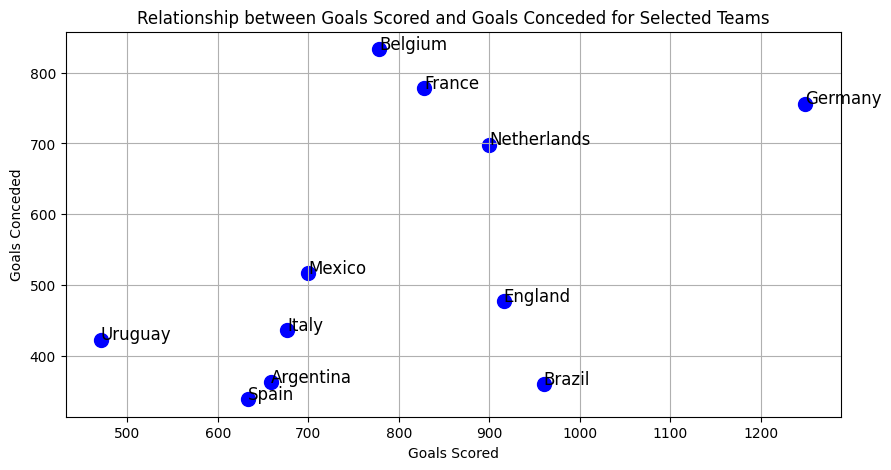

In [99]:
# Teams of interest
teams = ['Germany', 'Brazil', 'France', 'Italy', 'Netherlands', 'England', 'Argentina', 'Uruguay', 'Mexico', 'Spain', 'Belgium']

# Get data for goals scored and goals conceded for the selected teams
goals_scored = friendly_team_results.loc[teams, 'Goals Scored']
goals_conceded = friendly_team_results.loc[teams, 'Goals Conceded']

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(goals_scored, goals_conceded, c='b', marker='o', s=100)

# Label the points with the team names
for i, team in enumerate(teams):
    plt.annotate(team, (goals_scored[i], goals_conceded[i]), fontsize=12)

# Axis labels
plt.xlabel('Goals Scored')
plt.ylabel('Goals Conceded')

# Title of the plot
plt.title('Relationship between Goals Scored and Goals Conceded for Selected Teams')

# Show the plot
plt.grid(True)
plt.show()

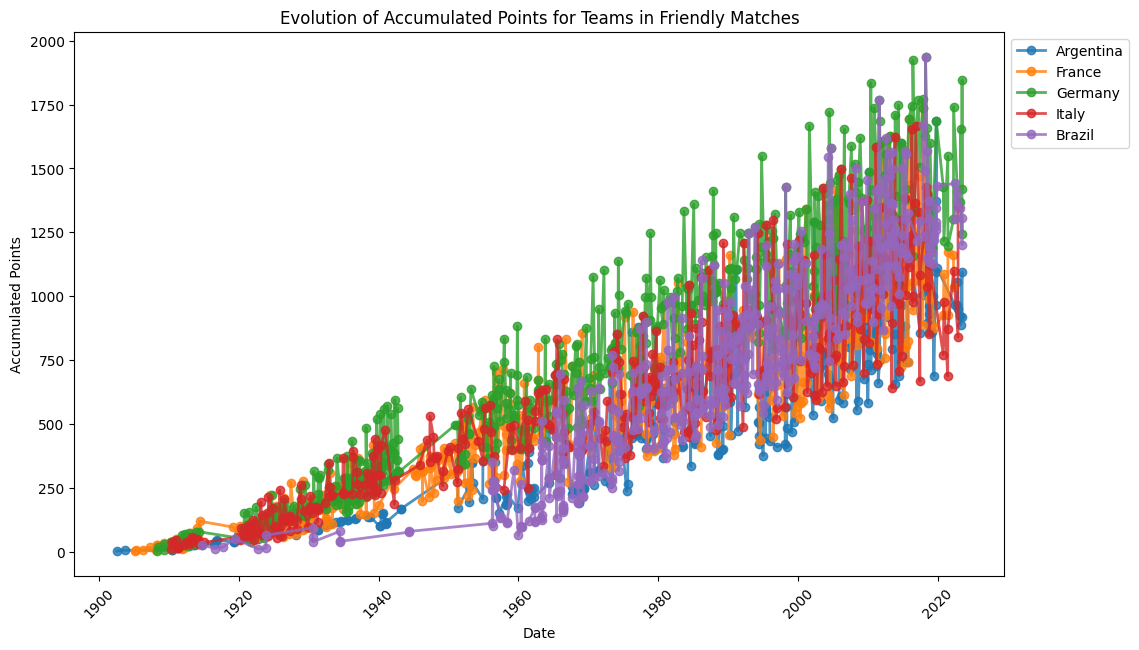

In [100]:
# Create a copy of the data to avoid changes to the original DataFrame
friendly_results_copy = friendly_results.copy()

# Ensure the date is in datetime format with dayfirst=True
friendly_results_copy['date'] = pd.to_datetime(friendly_results_copy['date'], dayfirst=True)

# Create a column for accumulated points
friendly_results_copy['Total Points'] = 0

# Dictionary to keep track of points for each team
team_points = {}

# Teams you want to highlight
highlighted_teams = ['Germany', 'Brazil', 'France', 'Italy', 'Argentina']

# Iterate through the matches and calculate accumulated points
for index, row in friendly_results_copy.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    
    # Initialize points if it's the first time encountering the team
    if home_team not in team_points:
        team_points[home_team] = 0
    if away_team not in team_points:
        team_points[away_team] = 0
    
    # Calculate points for the match and update accumulated points
    if row['home_score'] > row['away_score']:
        team_points[home_team] += 3
    elif row['home_score'] == row['away_score']:
        team_points[home_team] += 1
        team_points[away_team] += 1
    else:
        team_points[away_team] += 3
    
    # Assign accumulated points to the DataFrame
    friendly_results_copy.at[index, 'Total Points'] = team_points[home_team] + team_points[away_team]

# Create a line plot to show the evolution of accumulated points
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the teams and plot their points over time
for team in team_points:
    if team in highlighted_teams:
        team_data = friendly_results_copy[(friendly_results_copy['home_team'] == team) | (friendly_results_copy['away_team'] == team)]
        team_data = team_data.sort_values(by='date')
        # Use transparency to highlight only the selected teams
        alpha = 0.8 if team in highlighted_teams else 0.0
        ax.plot(team_data['date'], team_data['Total Points'], label=team, alpha=alpha, linewidth=2, marker='o')

# Labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Accumulated Points')
ax.set_title('Evolution of Accumulated Points for Teams in Friendly Matches')

# Show only labels for the highlighted teams
handles, labels = ax.get_legend_handles_labels()
filtered_labels = [label for label in labels if label in highlighted_teams]
ax.legend(handles=handles[:len(highlighted_teams)], labels=filtered_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Increase the bottom space for x-axis labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()